In [4]:
pip install solar-radiation-analysis

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install solar-data-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 MB 258.5 kB/s eta 0:00:0000:0100:08
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.1/935.1 kB 227.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 159.1 kB/s eta 0:00:00a 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 318.4 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [solar-data-tools][solar-data-tools]
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np

# Plotting
import seaborn as sns

sns.set_theme()
sns.set(font_scale=0.8)

# SDT Imports
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

In [12]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key="DEMO_KEY")

[============================================================] 100.0% ...queries complete in 20.4 seconds       



In [14]:
data_frame.head()

SiteID  ac_current  ac_power  ac_voltage  ambient_temp  \
2011-01-01 00:00:00    34.0         0.0    -200.0       284.0     -3.353332   
2011-01-01 00:15:00    34.0         0.0    -300.0       284.0     -3.381110   
2011-01-01 00:30:00    34.0         0.0    -300.0       284.0     -3.257777   
2011-01-01 00:45:00    34.0         0.0    -200.0       283.0     -3.296666   
2011-01-01 01:00:00    34.0         0.0    -300.0       284.0     -3.426110   

                     dc_current  dc_power  dc_voltage  inverter_error_code  \
2011-01-01 00:00:00         0.0    -200.0        16.0                  0.0   
2011-01-01 00:15:00         0.0    -200.0        16.0                  0.0   
2011-01-01 00:30:00         0.0    -200.0        16.0                  0.0   
2011-01-01 00:45:00         0.0       0.0        15.0                  0.0   
2011-01-01 01:00:00         0.0    -200.0        14.0                  0.0   

                     inverter_temp  module_temp  poa_irradiance  power_factor  \
2011-01-01 00:00:00           37.0    -7.105555             0.0           0.0   
2011-01-01 00:15:00           36.0    -6.944444             0.0           0.0   
2011-01-01 00:30:00           36.0    -6.344444             0.0           0.0   
2011-01-01 00:45:00           36.0    -6.655555             0.0           0.0   
2011-01-01 01:00:00           35.0    -7.405555             0.0           0.0   

                     relative_humidity  wind_direction  wind_speed  
2011-01-01 00:00:00             53.513         315.270    0.483250  
2011-01-01 00:15:00             53.581         308.835    0.698724  
2011-01-01 00:30:00             53.413         272.678    0.218156  
2011-01-01 00:45:00             52.406          55.913    0.159146  
2011-01-01 01:00:00             53.588         152.145    0.240508

In [16]:
#Running the DataHandler processing pipeline
dh = DataHandler(data_frame)

In [18]:
dh.run_pipeline(power_col="ac_power")


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list: 100%|██████████████████████████████████| 7/7 [00:14<00:00,  2.00s/it]



total time: 14.02 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.83s
Cleaning                   0.15s
Filtering/Summarizing      11.04s
    Data quality           0.11s
    Clear day detect       0.20s
    Clipping detect        5.71s
    Capacity change detect 5.03s



In [20]:
#Top-level reporting
dh.report()


-----------------
DATA SET REPORT
-----------------
length               4.00 years
capacity estimate    107.10 kW
data sampling        15 minutes
quality score        0.96
clearness score      0.55
inverter clipping    False
clipped fraction     0.00
capacity changes     False
data quality warning True
time shift errors    False
time zone errors     False
            


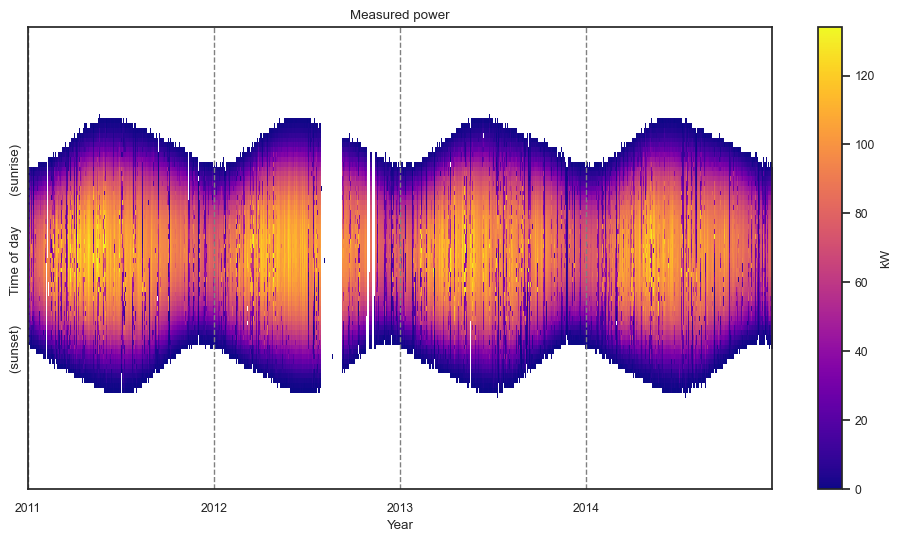

In [22]:
dh.plot_heatmap(matrix="raw");

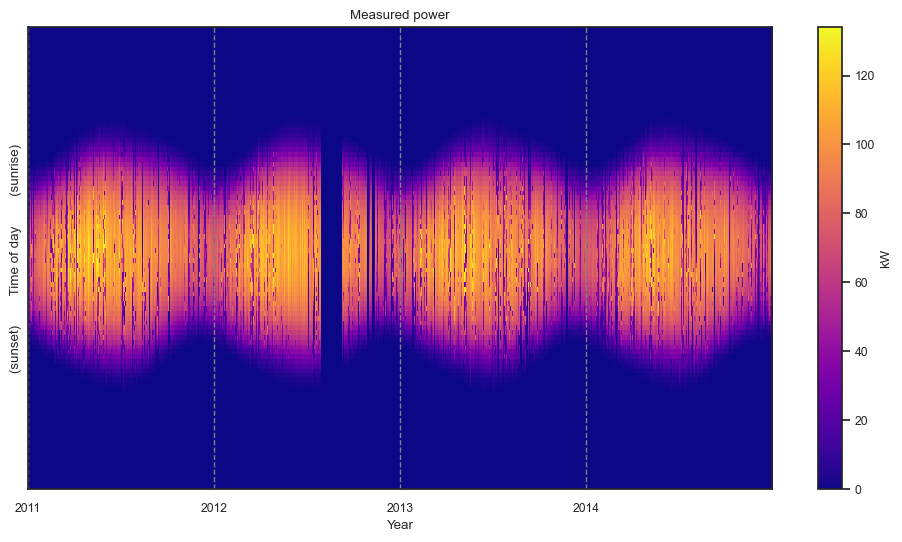

In [24]:
dh.plot_heatmap(matrix="filled", scale_to_kw=True);

In [26]:
#Access to data
type(dh.data_frame)

pandas.core.frame.DataFrame

In [28]:
dh.data_frame.columns

Index(['SiteID', 'ac_current', 'ac_power', 'ac_voltage', 'ambient_temp',
       'dc_current', 'dc_power', 'dc_voltage', 'inverter_error_code',
       'inverter_temp', 'module_temp', 'poa_irradiance', 'power_factor',
       'relative_humidity', 'wind_direction', 'wind_speed', 'seq_index'],
      dtype='object')

In [30]:
dh.data_frame["ac_power"].max()

134000.0

In [32]:
dh.data_frame["ac_power"].min()

-1300.0

In [34]:
dh.raw_data_matrix.shape

(96, 1461)

In [36]:
np.max(dh.raw_data_matrix)

nan

In [38]:
np.min(dh.raw_data_matrix)

nan

In [40]:
dh.filled_data_matrix.shape

(96, 1461)

In [42]:
np.max(dh.filled_data_matrix)

134000.0

In [44]:
np.min(dh.filled_data_matrix)

0.0

In [46]:
#Daywise filtering and selection
dh.daily_flags.__dict__.keys()

dict_keys(['density', 'linearity', 'no_errors', 'clear', 'cloudy', 'inverter_clipped', 'capacity_cluster'])

In [48]:
dh.daily_flags.no_errors

array([ True,  True,  True, ...,  True,  True,  True])

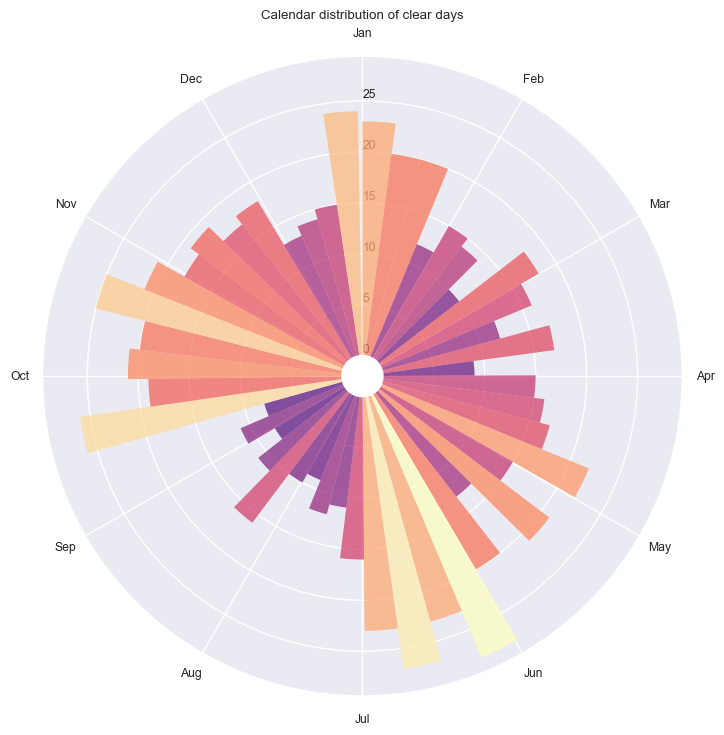

In [50]:
#Seasonal analysis using circular statistics
dh.plot_circ_dist(flag="clear");

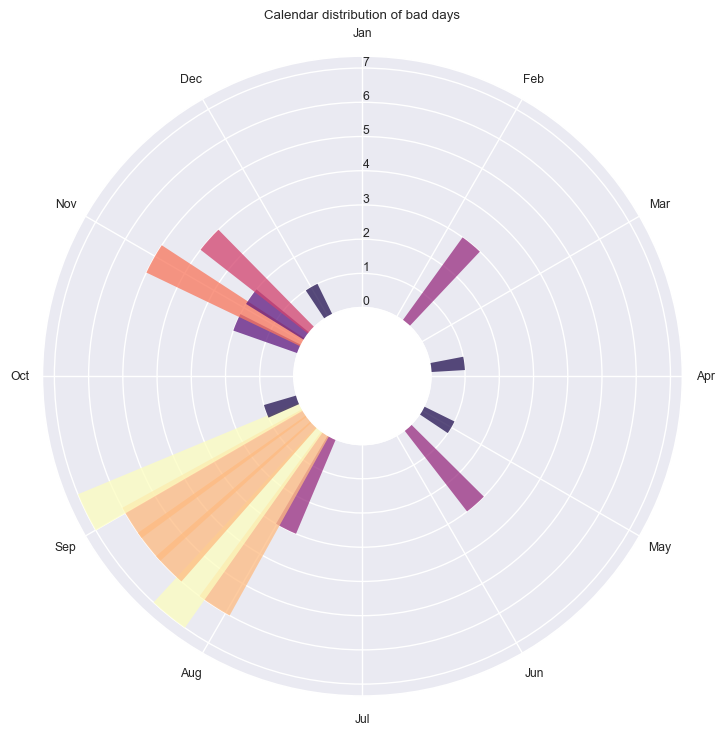

In [52]:
dh.plot_circ_dist(flag="bad");

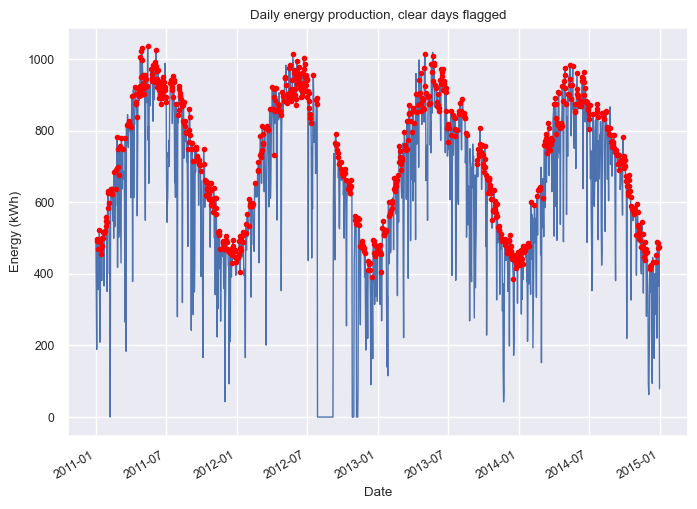

In [54]:
#Clear Days
dh.plot_daily_energy(flag="clear");

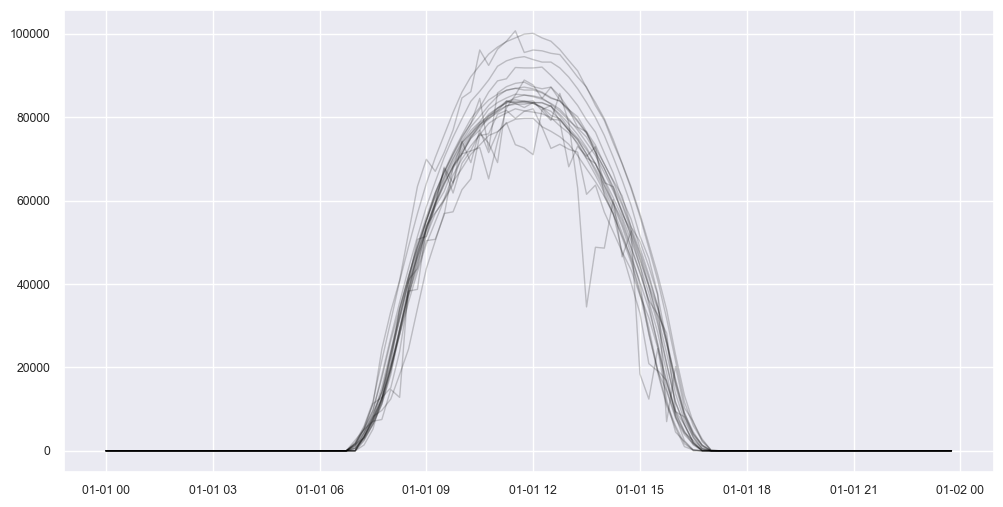

In [56]:
bix = dh.daily_flags.clear
dh.plot_daily_signals(
    boolean_index=bix, start_day=0, num_days=20, ravel=False, color="black", alpha=0.2
);

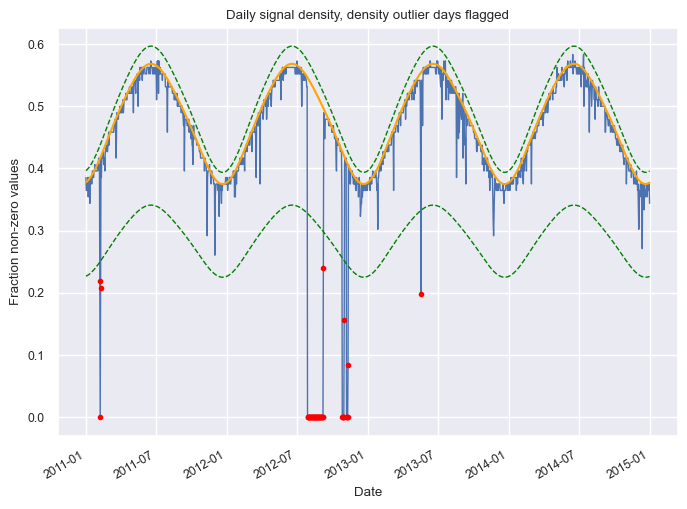

In [58]:
#Missing/corrupted data
dh.plot_density_signal(show_fit=True, flag="density");

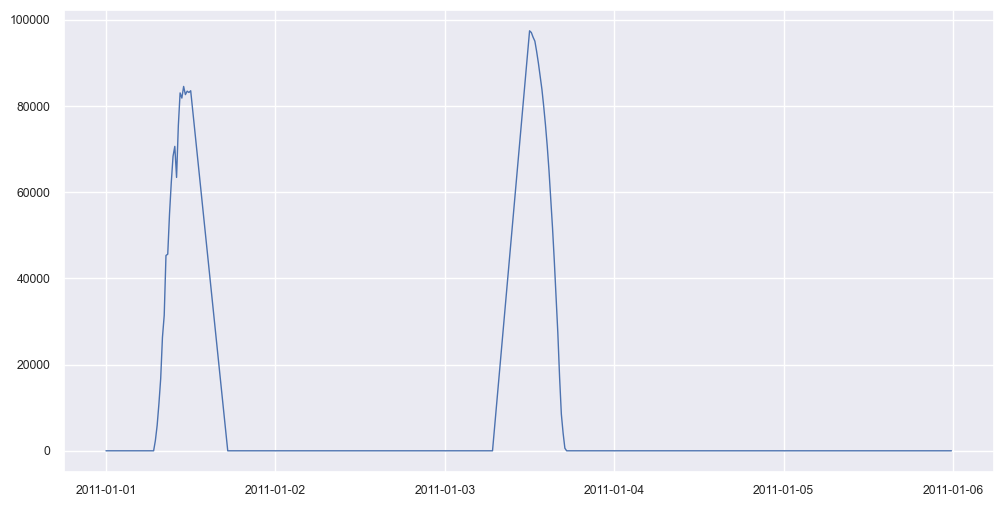

In [60]:
# Select days that failed the density test
bix = ~dh.daily_flags.density
dh.plot_daily_signals(boolean_index=bix, start_day=0, num_days=5, ravel=True);

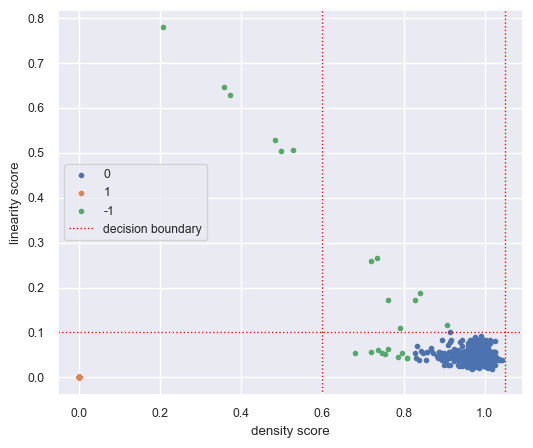

In [62]:
dh.plot_data_quality_scatter();

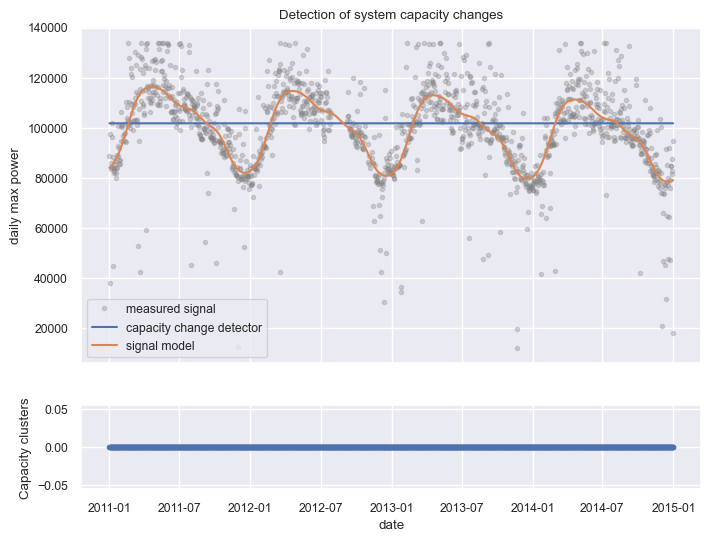

In [64]:
#Capacity change analysis
dh.plot_capacity_change_analysis();

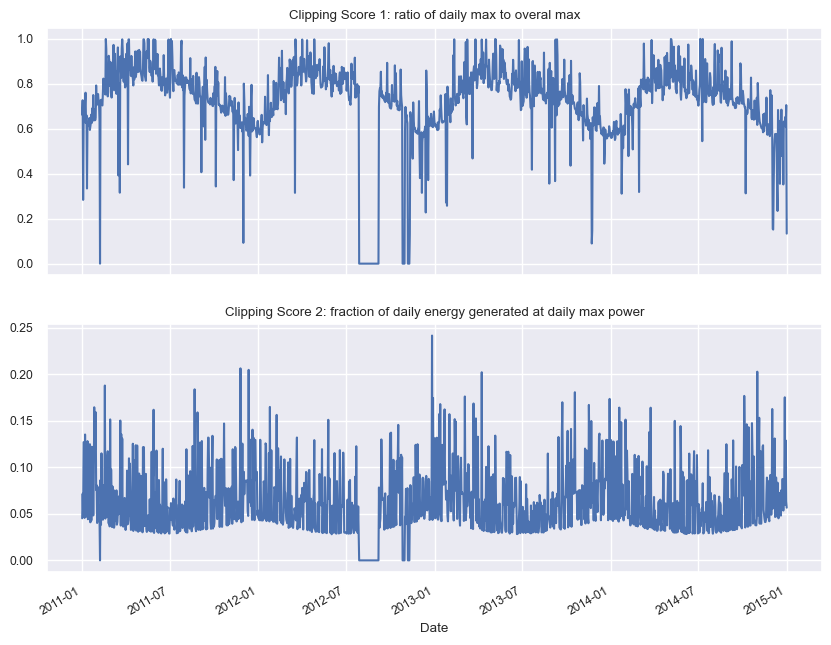

In [66]:
#Clipping analysis
dh.plot_clipping();

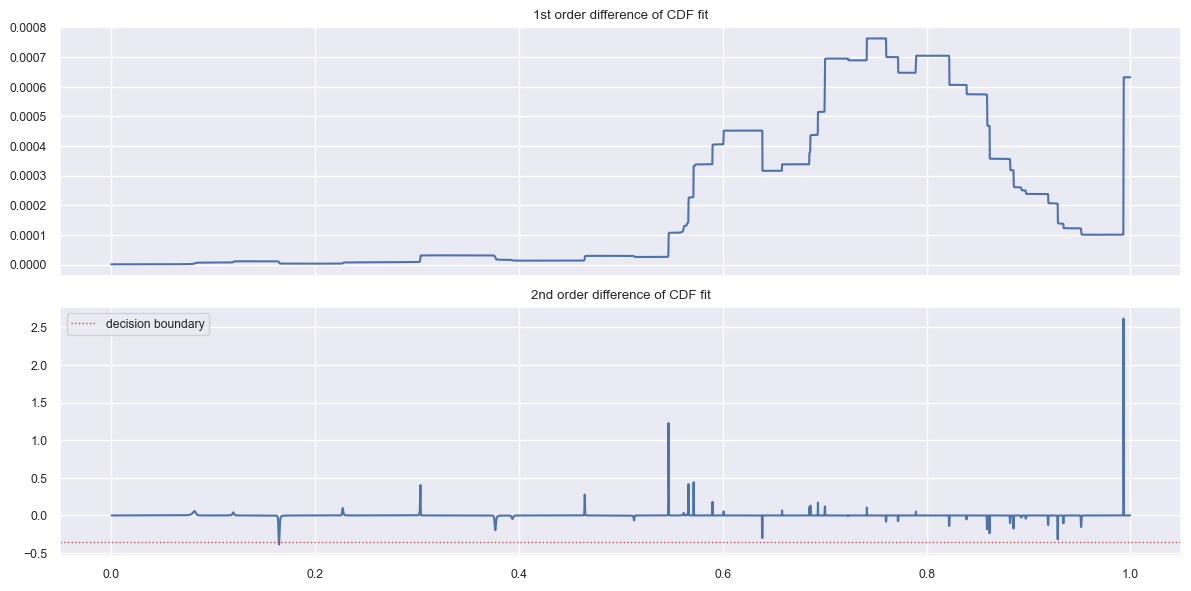

In [68]:
dh.plot_cdf_analysis();

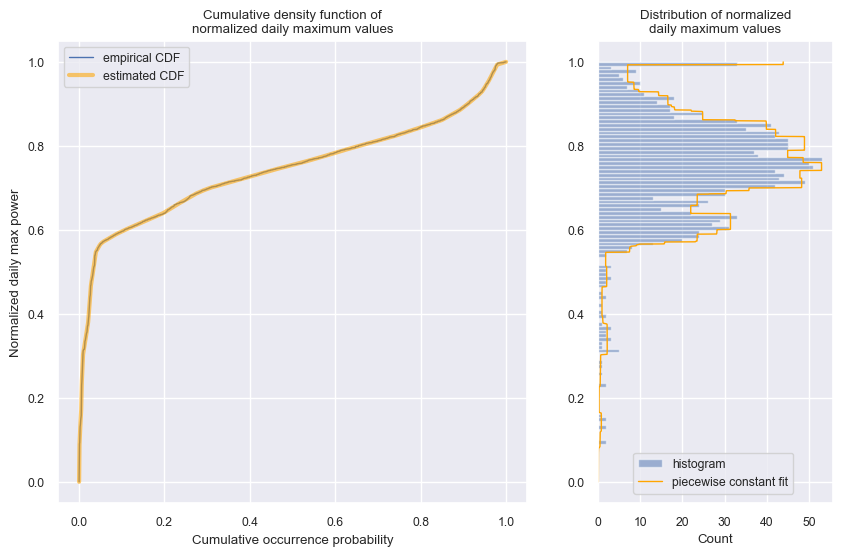

In [70]:
dh.plot_daily_max_cdf_and_pdf();

In [72]:
#Timeshift analysis
# This should not plot anything as we have not fixed any shifts in the pipeline run
dh.plot_time_shift_analysis_results()

Please run pipeline first.


In [74]:
dh.run_pipeline(power_col="ac_power", fix_shifts=True)


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list: 100%|██████████████████████████████████| 7/7 [00:16<00:00,  2.30s/it]



total time: 16.11 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.78s
Cleaning                   1.51s
Filtering/Summarizing      11.83s
    Data quality           0.11s
    Clear day detect       0.20s
    Clipping detect        6.52s
    Capacity change detect 5.00s



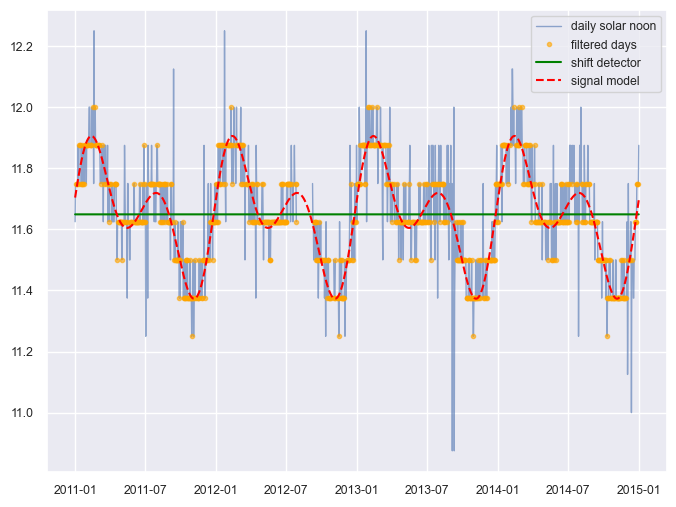

In [76]:
dh.plot_time_shift_analysis_results();